In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
db = pd.read_csv('/content/drive/MyDrive/ARTIFICIAL INTELIGENCE PROJECTS /dataset/dataset.csv')
display(db)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,1,0,-1,1,-1,1,1,1,1,-1,1,1,1,-1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
db.shape

(11055, 32)

In [6]:
db.columns 


Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [8]:
#give statistic information about every column 
db.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data = db.drop(['on_mouseover','Redirect','index','Statistical_report'], axis = 1).copy()

In [10]:
# knowling number of non-missing values for each variable
data.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Result                         0
dtype: int64

In [11]:
#give the total number of missing values 
data.isnull().sum().sum()

0

In [12]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
#for reducing the biases
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Result
0,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,0,-1,-1,1,1,1,1,1,-1,-1,-1,1,-1,1,-1
1,1,-1,1,1,1,1,0,1,1,1,1,1,-1,1,-1,-1,1,1,1,1,1,-1,-1,1,1,1,1,1
2,1,-1,1,1,1,-1,0,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,1,-1,1,-1,-1,1,0,-1
3,1,1,1,1,1,1,-1,1,-1,-1,-1,1,1,1,-1,1,-1,1,1,-1,-1,1,1,1,-1,1,0,1
4,-1,1,1,1,1,-1,1,1,-1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,-1,1,0,1


In [13]:
# Sepratating & assigning features and target columns to X & y
y = data['Result']
X = data.drop('Result',axis=1)
X.shape, y.shape

((11055, 27), (11055,))

In [14]:
from sklearn.metrics import accuracy_score
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [15]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8844, 27), (2211, 27))

In [16]:
#1 is legitemance 
#-1 is pishing 
#0 is suspish
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#random forest classifier
model1 = RandomForestClassifier(max_depth = 9)
model1.fit(X_train, y_train )

# kneighborsClassfier
model2 = KNeighborsClassifier(n_neighbors=4)
model2.fit(X_train, y_train )

#Logistic regression
model3 = LogisticRegression()
model3.fit(X_train, y_train )

LogisticRegression()

In [17]:
model1_train_predict = model1.predict(X_train)
model1_test_predict = model1.predict(X_test)

model2_train_predict = model2.predict(X_train)
model2_test_predict = model2.predict(X_test)

model3_train_predict = model3.predict(X_train)
model3_test_predict = model3.predict(X_test)

In [18]:
acc_model1_train = accuracy_score(y_train,model1_train_predict)
acc_model1_test = accuracy_score(y_test,model1_test_predict)

acc_model2_train = accuracy_score(y_train,model2_train_predict)
acc_model2_test = accuracy_score(y_test,model2_test_predict)


acc_model3_train = accuracy_score(y_train,model3_train_predict)
acc_model3_test = accuracy_score(y_test,model3_test_predict)


print("Random forest: Accuracy on training Data: {:.3f}".format(acc_model1_train))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_model1_test))

print("KneighborClassifier: Accuracy on training Data: {:.3f}".format(acc_model2_train))
print("KneighborClassifier: Accuracy on test Data: {:.3f}".format(acc_model2_test))

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_model3_train))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_model3_test))

Random forest: Accuracy on training Data: 0.954
Random forest: Accuracy on test Data: 0.954
KneighborClassifier: Accuracy on training Data: 0.965
KneighborClassifier: Accuracy on test Data: 0.947
Logistic Regression: Accuracy on training Data: 0.926
Logistic Regression: Accuracy on test Data: 0.929


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
expected = y_test

matrix = confusion_matrix(expected,model1_test_predict, labels=[1,-1])
print('confusion matrix Random Forest:\n',matrix)
matrix = classification_report(expected,model1_test_predict, labels=[1,-1])
print('confusion matrix Random Forest :\n',matrix)

confusion matrix Random Forest:
 [[1200   29]
 [  72  910]]
confusion matrix Random Forest :
               precision    recall  f1-score   support

           1       0.94      0.98      0.96      1229
          -1       0.97      0.93      0.95       982

    accuracy                           0.95      2211
   macro avg       0.96      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
expected = y_test

matrix = confusion_matrix(expected,model2_test_predict, labels=[1,-1])
print('confusion matrix KNneighbor:\n',matrix)
matrix = classification_report(expected,model2_test_predict, labels=[1,-1])
print('confusion matrix KNneighbor:\n',matrix)

confusion matrix KNneighbor:
 [[1146   83]
 [  34  948]]
confusion matrix KNneighbor:
               precision    recall  f1-score   support

           1       0.97      0.93      0.95      1229
          -1       0.92      0.97      0.94       982

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
expected = y_test

matrix = confusion_matrix(expected,model3_test_predict, labels=[1,-1])
print('confusion matrix Logistic regression:\n',matrix)
matrix = classification_report(expected,model3_test_predict, labels=[1,-1])
print('confusion matrix Logistic regression:\n',matrix)

confusion matrix Logistic regression:
 [[1158   71]
 [  85  897]]
confusion matrix Logistic regression:
               precision    recall  f1-score   support

           1       0.93      0.94      0.94      1229
          -1       0.93      0.91      0.92       982

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [22]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)

In [23]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [24]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.993512185987316 0.988734155399303 0.9806774172700141


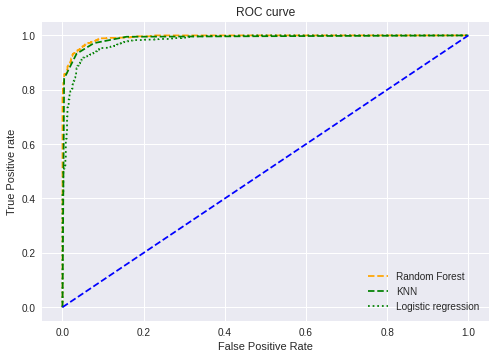

In [25]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='dotted',color='green', label='Logistic regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

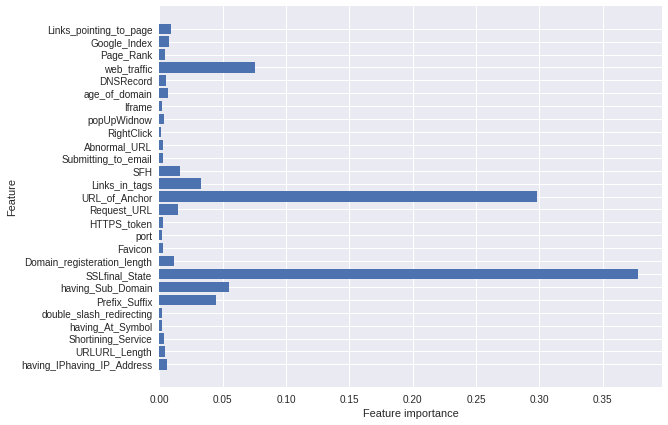

<Figure size 576x396 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), model1.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()
plt.savefig('Feature_importance.png')

In [ ]:
import joblib as jb
jb.dump(classifier, 'Pishing-model.pkl')

In [ ]:
model = jb.load("Pishing-model.pkl")

In [ ]:
#above code show the feature with the meayor importance is the SSfinal state follow by the URL anchor
##conclusion
##always pre proccesing and clean your data before anything related with ML
#we get stuck weeks by the memory error and the only porblem was the bad proccesing and cleaning of the dataset